## De Kracht van Centimeters: De Invloed van Lengte op Voetbal en Basketbal Prestatie


Namen: Mick van Vaneveld, Thijmen van Wijk, Ole Raap, Eva Klouwer <br>
Team: B5

## Verborgen code:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
import plotly.express as px

In [ ]:
%%capture captured_outputNBAGe
df = pd.read_excel('NBA.xlsx')
gemiddelden_per_ranking = df.groupby('rankings')['player_weight'].mean()
gemiddelden_per_ranking.plot(kind='bar', xlabel='Rating', ylabel='Gemiddeld gewicht (kg)', title='Gemiddeld gewicht per NBA rating')
plt.show()

In [ ]:
%%capture captured_outputFIFARATING
db_file = 'database.sqlite'
conn = sqlite3.connect(db_file)

player_attributes_df = pd.read_sql_query("SELECT player_fifa_api_id, overall_rating FROM player_attributes", conn)
player_df = pd.read_sql_query("SELECT player_fifa_api_id, weight FROM player", conn)

merged_df = pd.merge(player_attributes_df, player_df, on='player_fifa_api_id')
def pounds_to_kg(pounds):
    return pounds * 0.453592

merged_df['weight_kg'] = merged_df['weight'].apply(pounds_to_kg)

average_weight_per_rating = merged_df.groupby('overall_rating')['weight_kg'].mean()

plt.figure(figsize=(10, 6))
average_weight_per_rating.plot(kind='bar', color='skyblue')
plt.title('Gemiddeld gewicht per rating van FIFA')
plt.xlabel('Overall Rating')
plt.ylabel('Gemiddeld Gewicht (kg)')
plt.grid(True)
plt.show()

conn.close()

In [ ]:
%%capture captured_outputfifalengte
db_file = 'database.sqlite'
conn = sqlite3.connect(db_file)
players_df = pd.read_sql_query("SELECT * FROM player", conn)
player_attributes_df = pd.read_sql_query("SELECT * FROM player_attributes", conn)

merged_df = pd.merge(players_df, player_attributes_df, on='player_api_id')

merged_df = merged_df.dropna(subset=['height'])

merged_df = merged_df.drop_duplicates(subset=['player_api_id'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='overall_rating', y='height', data=merged_df, s=10)
plt.title('Rating vs Lengte FIFA spelers')
plt.xlabel('Rating')
plt.ylabel('Lengte (cm)')
plt.grid(True)
plt.show()

In [ ]:
%%capture captured_outputnbalengte
df = pd.read_excel('NBA.xlsx')

plt.figure(figsize=(10, 6))
plt.scatter(df['rankings'], df['player_height'], s=10)
plt.title('Rating vs lengte NBA spelers')
plt.ylabel('Lengte (cm)')
plt.xlabel('Rating')
plt.grid(True)
plt.show()

In [ ]:
%%capture captured_outputnbabmi
# NBA dataset inlezen
nba_df = pd.read_excel('NBA.xlsx')
nba_df['BMI'] = nba_df['player_weight'] / ((nba_df['player_height'] / 100) ** 2)
average_bmi_per_rating_nba = nba_df.groupby('rankings')['BMI'].mean().reset_index()

# Verbinden met de SQLite database en gegevens ophalen
db_file = 'database.sqlite'
conn = sqlite3.connect(db_file)
player_attributes_df = pd.read_sql_query("SELECT player_fifa_api_id, overall_rating FROM player_attributes", conn)
player_df = pd.read_sql_query("SELECT player_fifa_api_id, weight, height FROM player", conn)

# Gegevens samenvoegen op basis van player_fifa_api_id
merged_df = pd.merge(player_attributes_df, player_df, on='player_fifa_api_id')

# Functie om ponden naar kilogrammen om te zetten
def pounds_to_kg(pounds):
    return pounds * 0.453592

# Gewicht omzetten naar kg
merged_df['weight_kg'] = merged_df['weight'].apply(pounds_to_kg)

# BMI berekenen (BMI = weight_kg / (height_m ** 2))
merged_df['height_m'] = merged_df['height'] / 100
merged_df['bmi'] = merged_df['weight_kg'] / (merged_df['height_m'] ** 2)
average_bmi_per_rating_fifa = merged_df.groupby('overall_rating')['bmi'].mean().reset_index()

# Plotly scatter plot maken
fig = px.scatter(
    labels={'x': 'Rating', 'y': 'Gemiddeld BMI'},
    title='Gemiddeld BMI per Rating voor NBA en FIFA Spelers'
)

# NBA scatter plot toevoegen
fig.add_scatter(
    x=average_bmi_per_rating_nba['rankings'],
    y=average_bmi_per_rating_nba['BMI'],
    mode='markers',
    name='NBA',
    marker=dict(color='skyblue', size=10)
)

# FIFA scatter plot toevoegen
fig.add_scatter(
    x=average_bmi_per_rating_fifa['overall_rating'],
    y=average_bmi_per_rating_fifa['bmi'],
    mode='markers',
    name='FIFA',
    marker=dict(color='salmon', size=10)
)

# Layout bijwerken
fig.update_layout(
    xaxis_title='Rating',
    yaxis_title='Gemiddeld BMI',
)

# Plot weergeven
fig.show()

In [ ]:
%%capture captured_outputnbapunten
# Step 1: Read the data
file_path = 'NBA.xlsx'  # Replace with the path to your Excel file
df = pd.read_excel(file_path)

# Step 2: Create the hexbin plot
plt.figure(figsize=(10, 6))
hb = plt.hexbin(df['player_height'], df['pts'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(hb, label='Count')
plt.title('Player Height vs. Points per season (NBA)')
plt.xlabel('Height (cm)')
plt.ylabel('Points')
plt.grid(True)
plt.show()

In [ ]:
%%capture captured_outputlengteblok
# Step 1: Read the data
file_path = 'NBA.xlsx'  # Replace with the path to your Excel file
df = pd.read_excel(file_path)

# Step 2: Create the hexbin plot
plt.figure(figsize=(10, 6))
hb = plt.hexbin(df['player_height'], df['BLK'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(hb, label='Aantal spelers')
plt.title('Lengte van Spelers vs. Aantal Blocks per wedstrijd')
plt.xlabel('Lengte (cm)')
plt.ylabel('Aantal Blocks per Seizoen')
plt.grid(True)
plt.show()

In [ ]:
%%capture captured_outputvoetballengte
# Stap 1: Verbind met de SQLite database en lees de gegevens
db_file = 'database.sqlite'
conn = sqlite3.connect(db_file)
players_df = pd.read_sql_query("SELECT player_api_id, player_name, height FROM player", conn)
player_attributes_df = pd.read_sql_query("SELECT player_api_id FROM player_attributes", conn)

# Stap 2: Laad de Excel gegevens
file_path = 'merged_dataset.xlsx'
excel_df = pd.read_excel(file_path)

# Stap 3: Merge de dataframes
merged_df = pd.merge(players_df, player_attributes_df, on='player_api_id')
merged_df = merged_df.dropna(subset=['height'])
merged_df = merged_df.drop_duplicates(subset=['player_api_id'])

# Verwijder duplicaten uit de Excel dataset
excel_df = excel_df.drop_duplicates(subset=['Player'])

# Stap 4: Merge de SQL en Excel gegevens op speler naam
final_df = pd.merge(merged_df, excel_df, left_on='player_name', right_on='Player')

# Stap 5: Bereid de data voor de visualisatie
final_df = final_df[['player_name', 'height', 'Goals']].dropna()

# Stap 6: Maak een hexbin plot
plt.figure(figsize=(12, 8))
plt.hexbin(x=final_df['height'], y=final_df['Goals'], gridsize=30, cmap='YlGnBu', mincnt=1)
plt.colorbar(label='Aantal spelers')
plt.title('Gemiddelde Doelpunten per Wedstrijd per Spelerlengte')
plt.xlabel('Lengte (cm)')
plt.ylabel('Gemiddelde Doelpunten per Wedstrijd')
plt.show()

In [ ]:
%%capture captured_outputlengtetackel
# Stap 1: Verbind met de SQLite database en lees de gegevens
db_file = 'database.sqlite'
conn = sqlite3.connect(db_file)
players_df = pd.read_sql_query("SELECT player_api_id, player_name, height FROM player", conn)
player_attributes_df = pd.read_sql_query("SELECT player_api_id FROM player_attributes", conn)

# Stap 2: Laad de Excel gegevens
file_path = 'merged_dataset.xlsx'
excel_df = pd.read_excel(file_path)

# Stap 3: Merge de dataframes
merged_df = pd.merge(players_df, player_attributes_df, on='player_api_id')
merged_df = merged_df.dropna(subset=['height'])
merged_df = merged_df.drop_duplicates(subset=['player_api_id'])

# Verwijder duplicaten uit de Excel dataset
excel_df = excel_df.drop_duplicates(subset=['Player'])

# Stap 4: Merge de SQL en Excel gegevens op speler naam
final_df = pd.merge(merged_df, excel_df, left_on='player_name', right_on='Player')

# Stap 5: Bereid de data voor de visualisatie
final_df = final_df[['player_name', 'height', 'TklWon']].dropna()

# Stap 6: Maak een hexbin plot voor Tackles per lengte
plt.figure(figsize=(12, 8))
plt.hexbin(x=final_df['height'], y=final_df['TklWon'], gridsize=30, cmap='YlGnBu', mincnt=1)
plt.colorbar(label='Aantal spelers')
plt.title('Gemiddelde Tackles gewonnen per Spelerlengte')
plt.xlabel('Lengte (cm)')
plt.ylabel('Gemiddelde gewonnen Tackles per Wedstrijd')
plt.show()

In [ ]:
%%capture captured_outputboxplot
db_file = 'database.sqlite'
conn = sqlite3.connect(db_file)
players_df = pd.read_sql_query("SELECT player_api_id, player_name, height FROM player", conn)
player_attributes_df = pd.read_sql_query("SELECT player_api_id FROM player_attributes", conn)

# Stap 2: Laad de Excel gegevens
file_path = 'merged_dataset.xlsx'
excel_df = pd.read_excel(file_path)

# Stap 3: Merge de dataframes
merged_df = pd.merge(players_df, player_attributes_df, on='player_api_id')
merged_df = merged_df.dropna(subset=['height'])
merged_df = merged_df.drop_duplicates(subset=['player_api_id'])

# Verwijder duplicaten uit de Excel dataset
excel_df = excel_df.drop_duplicates(subset=['Player'])

# Stap 4: Merge de SQL en Excel gegevens op speler naam
final_df = pd.merge(merged_df, excel_df, left_on='player_name', right_on='Player')

# Stap 5: Bereid de data voor de visualisatie
final_df = final_df[['player_name', 'height', 'DriSucc%']].dropna()

# Stap 6: Maak een boxplot voor lengte vs. % succesvolle dribbels
plt.figure(figsize=(12, 8))
final_df['height_bins'] = pd.cut(final_df['height'], bins=10)
final_df.boxplot(column='DriSucc%', by='height_bins', grid=False, vert=False, patch_artist=True)

# Boxplot-aanpassingen voor betere visualisatie
plt.title('Lengte versus % Succesvolle Dribbels')
plt.suptitle('')  # Verwijder de default suptitle
plt.xlabel('% Succesvolle Dribbels')
plt.ylabel('Lengte (cm) Bins')
plt.show()

## Samenvatting

In dit onderzoek worden twee perspectieven geëvalueerd om te bepalen of lengte invloed heeft op de prestaties van topsporters in voetbal en basketbal. Het eerste perspectief stelt dat langere spelers voordelen hebben, zoals hogere ratings en betere prestaties bij blocken en tackelen. Het tweede perspectief suggereert dat kleinere spelers juist voordelen hebben, zoals hogere ratings en betere vaardigheden bij scoren en dribbelen.

**Analyse en Resultaten**
Gegevensverzameling en Methodologie:

Basketbal: Data van NBA-spelers, inclusief lengte, gewicht, gespeelde wedstrijden, punten, en ratings uit NBA2K. <br>
Voetbal: Data van professionele voetballers, inclusief lengte, gewicht, en ratings uit FIFA. <br>
<br>
<br>
Gewicht: Onderzoek naar de invloed van gewicht op de prestaties, waarbij geen significante correlatie werd gevonden. <br>
Lengte en Prestaties:

Basketbal: Spelers met een lengte tussen 200 cm en 215 cm hebben iets hogere ratings, maar er is geen duidelijke correlatie tussen lengte en punten per seizoen. <br>
Voetbal: Spelers van gemiddelde lengte (181,9 cm) presteren beter in dribbelen en scoren, zonder significante voordelen voor langere of kortere spelers.
BMI (Body Mass Index):

Basketbal: Hogere ratings corresponderen met een hogere BMI, wat suggereert dat grootte en kracht belangrijk zijn. <br>
Voetbal: Hogere BMI’s worden geassocieerd met hogere ratings, wat duidt op het belang van fysieke robuustheid. <br>

**Conclusie**
Het onderzoek toont aan dat lengte op zich geen doorslaggevende factor is voor betere prestaties in voetbal en basketbal. De gemiddelde lengte blijkt geen significant voordeel te bieden. De combinatie van lengte en BMI speelt een grotere rol, waarbij een gezonde balans tussen grootte en gewicht belangrijker is dan alleen de lengte. Zowel langere als kortere spelers hebben geen consistent voordeel; in plaats daarvan is de algehele fysieke fitheid en technische vaardigheid cruciaal voor succes in beide sporten.

## Introductie


In dit onderzoek worden twee perspectieven getoetst en beantwoord aan de hand van verschillende datasets en plots:

Perspectief 1: Langere individuen hebben voordelen in de sporten voetbal en basketbal.

Argument 1: Lange spelers hebben een hogere rating dan kleinere spelers.<br>
Argument 2: Lange spelers zijn beter in het blocken of tackelen dan kleinere spelers.

Perspectief 2: Kleinere spelers hebben vaak voordelen in de sporten voetbal en basketbal.

Argument 1: Kleinere spelers hebben hogere ratings dan langere spelers.<br>
Argument 2: Kleinere spelers zijn beter in scoren en dribbelen dan langere spelers.

Een argument ten gunste van perspectief 1 zou kunnen zijn dat langere spelers meer kans hebben om te scoren, rebounds te pakken en te verdedigen (Jeannette Kras, 2023). Ook biedt lengte voordelen in sporten waar reikwijdte, snelheid en het vermogen om grote afstanden af te leggen belangrijk zijn (NVK, 2024).

Om inzicht te krijgen in hoe lengte prestaties beïnvloedt, hebben we gegevens van professionele voetbalspelers en NBA-basketbalspelers geanalyseerd. Naast lengte hebben we ook gekeken naar factoren zoals BMI en gewicht om de verschillen in prestaties te verklaren. In dit onderzoek maken we gebruik van zogenaamde ratings, die afkomstig zijn uit de spellen NBA2K en FIFA. Deze spellen beoordelen spelers op een rating-schaal door gegevens te verzamelen, te analyseren en regelmatig te updaten, waardoor de ratings zo precies en actueel mogelijk blijven.

Voordat we de datasets analyseerden, hebben we vastgesteld dat professionele basketbalspelers gemiddeld 200,6 cm lang zijn, terwijl professionele voetballers gemiddeld 181,9 cm meten. Hier is dus een duidelijk lengteverschil te zien tussen de twee sporten. Professionele voetballers zijn gemiddeld wat korter, wat een gunstig argument kan zijn voor perspectief 2. Ook het gemiddelde gewicht verschilt: professionele basketbalspelers wegen gemiddeld 100,3 kg tegenover 76,385 kg voor professionele voetballers. Deze bevindingen suggereren dat er een zichtbaar verschil is in de topsporten, maar het is belangrijk om te onderzoeken of lengte de factor is die zorgt voor betere prestaties. Daarom zijn we op zoek gegaan naar datasets met factoren die wellicht invloed zouden kunnen hebben op prestaties.

## Dataset en processing

In dit onderzoek zijn er verschillende datasets gecombineerd tot drie datasets:

**NBA** <br>
Voor de NBA dataset zijn er twee verschillende datasets gebruikt, deze zijn op de naam van de spelers gecombineerd en terug te vinden in het xlsx bestand met de naam NBA: <br>
De de eerste dataset is te vinden via deze link: https://www.kaggle.com/datasets/justinas/nba-players-data <br>
In deze data set is onder andere de lengte, het gewicht, gespeelde wedstrijden en punten te vinden per speler. <br>

In de tweede dataset zijn er ook vergelijkbare variabelen te vinden, alleen zijn hier ook de ratings van de spelers toegevoegd. Verder heeft deze set gedetailleerdere variabelen dan de eerste zoals hoeveel procent een speler scoort of hoe vaak een dribbel succesvol is. Deze dataset is te vinden via de volgende link: https://www.kaggle.com/datasets/willyiamyu/nba-2k-ratings-with-real-nba-stats 

**Voetbal** <br>
Voor de voetbal datasets zijn er 3 verschillende sets samen gebruikt, de eerste is een sqlite bestand met informatie over de spelers zelf zoals naam, land van herkomst, gewicht en lengte. Deze is te vinden op: https://www.kaggle.com/datasets/hugomathien/soccer <br>

Deze sqlite database wordt gebruikt in combinatie met de volgende twee datasets: <br>
https://www.kaggle.com/datasets/vivovinco/20212022-football-player-stats <br>
en <br>
https://www.kaggle.com/datasets/ahmettezcantekin/fifa-21-player-ratings <br>
Uit de eerste dataset zijn variabelen zoals dribbels en doelpunten gebruikt en uit de tweede dataset zijn alleen de ratings en de namen van de spelers gebruikt. Deze dataset is terug te vinden onder de naam merged_dataset.

## Gewicht

Wanneer er gekeken wordt naar lengte, is gewicht natuurlijk ook van belang. Wanneer iemand klein en zwaar is, kan dit betekenen dat diegene meer spiermassa kan hebben, maar het kan ook betekenen dat diegene een beetje gezet is, waardoor prestaties zouden kunnen dalen. Bij het analyseren van de dataset van het gemiddelde gewicht per NBA rating, ontdekte we dat gewicht niet erg veel uitmaakt. Het is een constante lijn waar bijna geen verschil in te vinden is. Bij de meeste NBA-spelers hoort ongeveer hetzelfde gewicht, alleen de aller beste spelers zijn gemiddeld iets zwaarder dan de rest van de spelers.

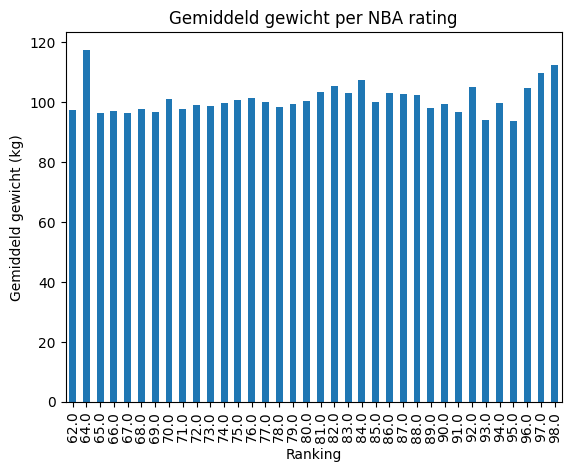

In [ ]:
captured_outputNBAGe.show()

Er is ook gekeken naar het gemiddelde gewicht per rating van FIFA-spelers, oftewel voetballers. Hieruit blijkt dat het gemiddelde gewicht van FIFA-spelers bij elke rating ongeveer hetzelfde is. Dit vormt namelijk een constante lijn. Omdat het gemiddelde gewicht eigenlijk niet veel invloed heeft op iemands ranking, ondersteunt dit beide perspectieven die beweren dat lengte juist invloed heeft op de prestaties.

Daarom zal er gekeken worden of lengte wel de belangrijkste factor is voor het verschil in prestaties.

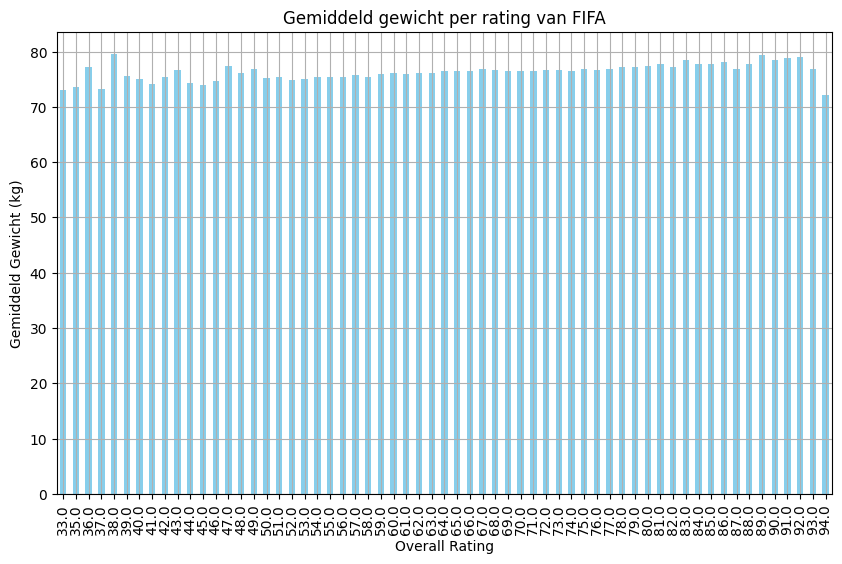

In [ ]:
captured_outputFIFARATING.show()

## Lengte

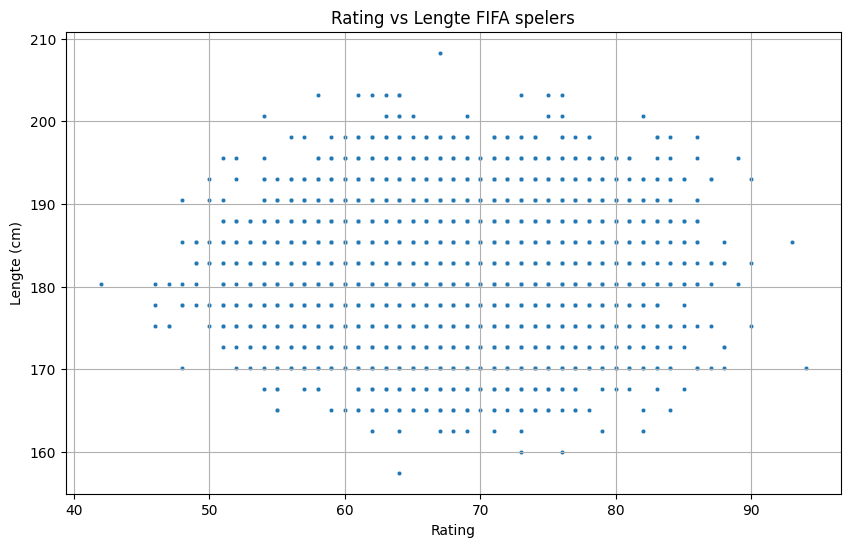

In [ ]:
captured_outputfifalengte.show()


Bij nadere analyse van de grafiek valt op dat de meeste spelers zich concentreren in een lengtebereik van ongeveer 165 cm tot 200 cm, met enkele uitschieters aan beide uiteinden. De ratings van deze spelers vertonen een aanzienlijke variatie, zonder een duidelijke correlatie tussen lengte en rating. Zowel spelers met hoge als lage ratings zijn te vinden binnen het gehele lengtebereik, wat suggereert dat factoren zoals vaardigheid, ervaring en positie op het veld mogelijk belangrijker zijn dan alleen lengte.

Het patroon dat uit de grafiek naar voren komt, benadrukt dat, ondanks de voordelen die lengte in bepaalde situaties kan bieden, de algehele prestatie van een voetballer afhankelijk is van een complex samenspel van meerdere factoren. Deze analyse onderstreept dus dat naast lengte ook factoren zoals technische vaardigheden, fysieke fitheid en tactisch inzicht belangrijke rollen spelen in het succes van een voetballer.

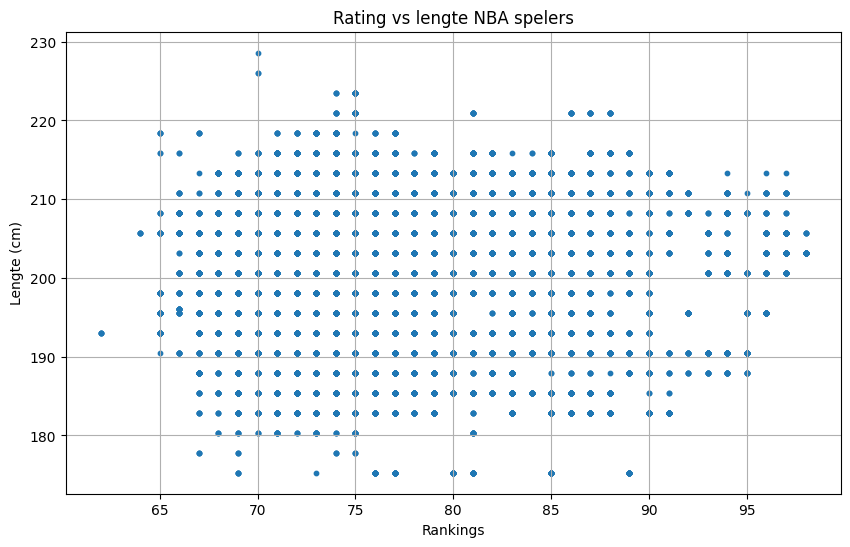

In [ ]:
captured_outputnbalengte.show()

Bij nadere analyse van de grafiek valt op dat de meeste spelers zich concentreren in een lengtebereik hoger dan bij voetbal, namelijk ongeveer 180 cm tot 220 cm, met enkele uitschieters aan beide uiteinden. De ratings van deze spelers vertonen een aanzienlijke variatie, zonder een duidelijke correlatie tussen lengte en rating. Echter, tussen 200 cm en 215 cm zijn er enkele spelers met ratings die iets hoger liggen, wat aangeeft dat spelers in deze lengtecategorie gemiddeld wat hogere ratings hebben. Dit suggereert dat er toch enig verband bestaat tussen lengte en rating, waarbij langere spelers enigszins hogere ratings behalen vanwege hun fysieke voordelen die hen effectiever maken in de sport.

Om de gestelde perspectieven verder te onderzoeken, zal er gekeken worden naar het BMI, dat wellicht een factor zou kunnen zijn die bijdraagt aan de prestaties van spelers.

## BMI

De BMI (Body Mass Index) is een wereldwijd gebruikte maatstaf die aangeeft of je een gezond gewicht hebt in verhouding tot je lengte. Het is een indicatie van de gezondheid van je lichaamsgewicht (Voedingscentrum, z.d.). Deze kan worden berekend door het gewicht in kilogrammen te delen door de lengte in meters in het kwadraat: BMI = Gewicht (kg) / (lengte (m))². Voor topsporters kan het BMI dus invloed hebben op activiteiten zoals sprinten en verticaal springen, die van belang zijn voor zowel basketbal- als voetbalprestaties. Een gezond BMI kan bijdragen aan een betere algehele fysieke conditie en prestaties in beide sporten.



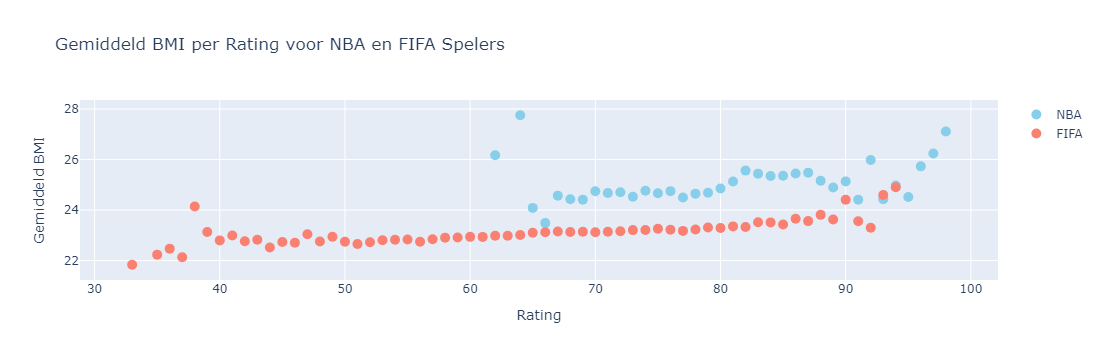

In [ ]:
captured_outputnbabmi.show()

Voor NBA-spelers zien we dat hogere ratings vaak samengaan met een hogere gemiddelde BMI, zoals blijkt uit de stijgende lijn in de grafiek. Deze relatie toont aan dat spelers met hogere ratings, vooral die hoger dan 95, doorgaans een nog hogere BMI hebben.

Onder een rating van 65 zien we ook dat de BMI significant stijgt. Dit zou kunnen komen doordat spelers met lagere ratings een zwaardere lichaamsbouw en meer spiermassa nodig hebben om effectief te zijn in hun speelstijl. Aan de andere kant kunnen spelers met hogere ratings deze fysieke kenmerken omzetten naar een betere fysieke speelstijl, waardoor ze hun vaardigheden efficiënter kunnen benutten op het veld.

Kortom, de grafiek toont aan dat spelers met een hoger BMI vaak hogere ratings hebben in de NBA, wat impliceert dat grootte en kracht voordelen kunnen bieden in deze sport.

Ook voor FIFA-spelers is er een duidelijke trend: naarmate de rating van spelers stijgt, neemt ook hun gemiddelde BMI toe. Spelers met een rating rond de 30 tot 50 hebben een gemiddelde BMI van ongeveer 22 tot 23. Naarmate de rating stijgt richting 90, zien we dat de gemiddelde BMI ook toeneemt, tot ongeveer 24,5. Dit duidt erop dat betere FIFA-spelers vaak een hogere BMI hebben, wat kan betekenen dat ze fysiek sterker en gespierder zijn.

Een robuustere lichaamsbouw kan dus een voordeel zijn in verschillende aspecten van het voetbal, zoals fysieke duels, snelheid en uithoudingsvermogen. Spelers met lagere ratings hebben doorgaans een lagere BMI, wat kan wijzen op een minder robuuste lichaamsbouw.

Hoewel BMI en gewicht goede indicatoren kunnen zijn van de fysieke gesteldheid, willen we graag meer factoren combineren met lengte om een duidelijker inzicht te krijgen of lengte werkelijk een dominante factor is bij de prestaties van spelers. We beginnen met het onderzoeken van de lengte in verhouding tot het aantal punten per seizoen van een speler.

## Technische vaardigheden

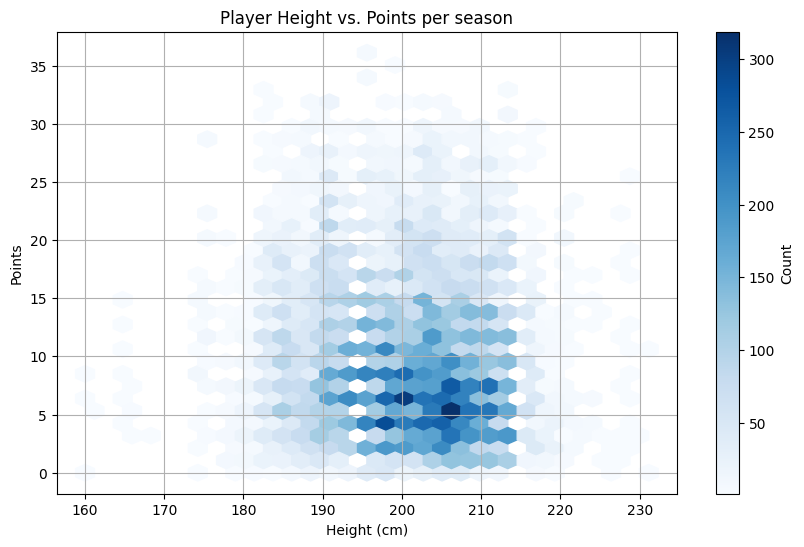

In [ ]:
captured_outputnbapunten.show()

Bovenstaande afbeelding laat zien dat vooral het midden ten opzichte van de x-as donkerdere kleuren bevat. De randen ten opzichte van de x-as en y-as zijn wat lichter. Bij een lengte van 215 cm en hoger zijn de punten per seizoen vrij laag, net als bij een lengte van 185 cm en lager worden er minder punten gescoord. Hieruit kan worden gesuggereerd dat zowel lange als minder lange spelers geen voordeel hebben bij het scoren van punten. De donkerste plekken zijn ongeveer te vinden bij de lengte van 200,6 cm, wat zoals vernoemd in de inleiding, het gemiddelde is van de lengte van basketbalspelers. Op basis hiervan kan worden geconcludeerd dat lengte geen significant effect heeft op het aantal punten dat NBA-spelers scoren.

Langere spelers zijn mogelijk ook beter in verdedigen. Daarom hebben is er ook gekeken naar het aantal blocks per speler per wedstrijd.


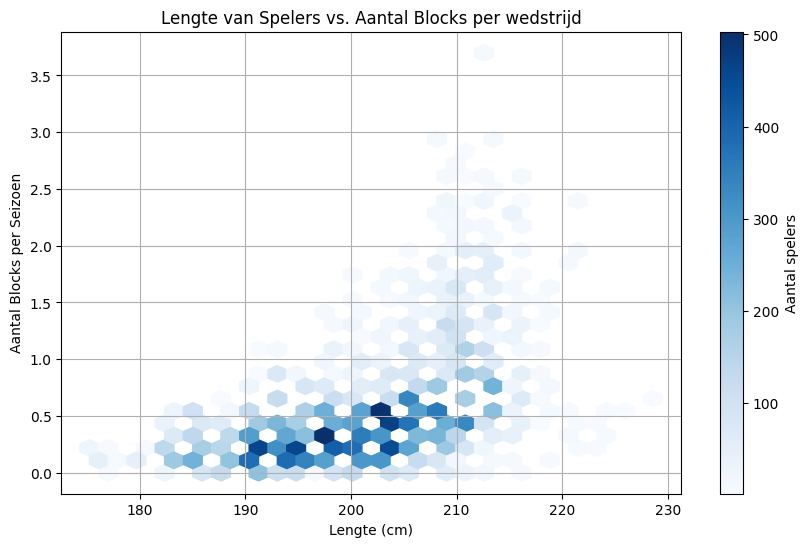

In [ ]:
captured_outputlengteblok.show()

Ook hier is te zien dat na een bepaalde waarde van de lengte, in dit geval groter dan 215 cm en kleiner dan 180 cm, het aantal blocks per seizoen minder wordt. Spelers die langer zijn dan gemiddeld zijn een klein beetje beter in het blokken dan kleinere spelers, dit is te zien aan de lichte kleuren die rond 210 cm omhoog gaan. Hierdoor is vast te stellen dat lange speler lichtelijk beter zijn in blokken dan kleinere spelers.

In de volgende plot is te zien wat de invloed van lengte is op voetballers en hun scorend vermogen per wedstrijd

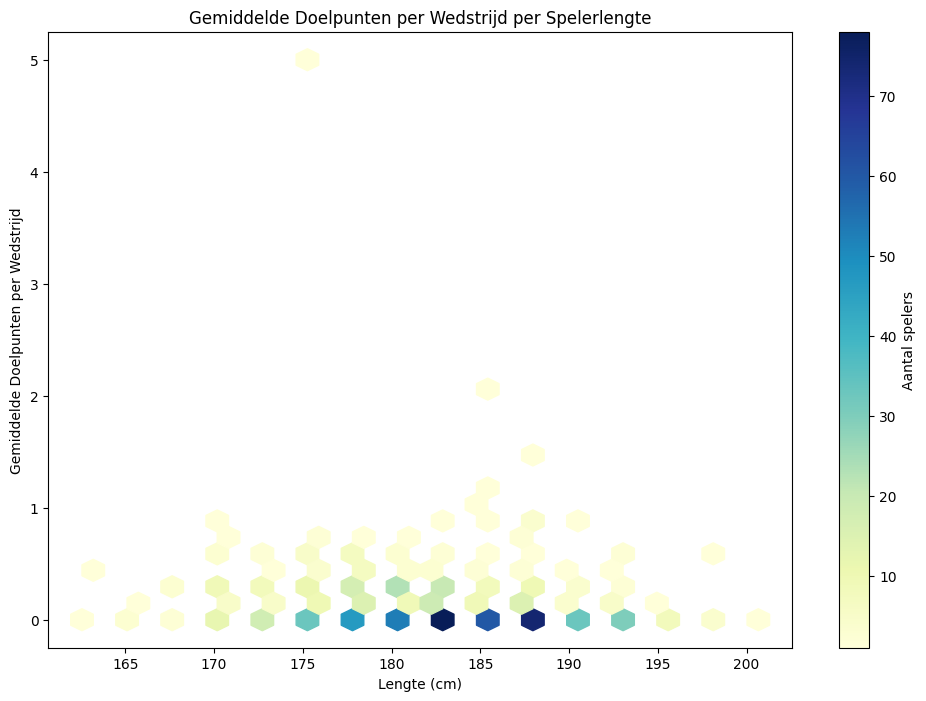

In [ ]:
captured_outputvoetballengte.show()

De hexbin plot laat hier zien dat het donkerste punt correspondeert met de gemiddelde lengte die eerder is berekend bij voetballers (181,9 cm). Het midden van de plot vormt dus ook het zwaartepunt. Zowel langere als kortere spelers hebben geen voordeel wat betreft het aantal gescoorde doelpunten in een wedstrijd. Hieruit kan worden geconcludeerd dat lengte geen potentieel voordeel biedt bij het scoren van doelpunten.

Er is ook gekeken naar of het aantal tackles hoger is naarmate een speler langer is.

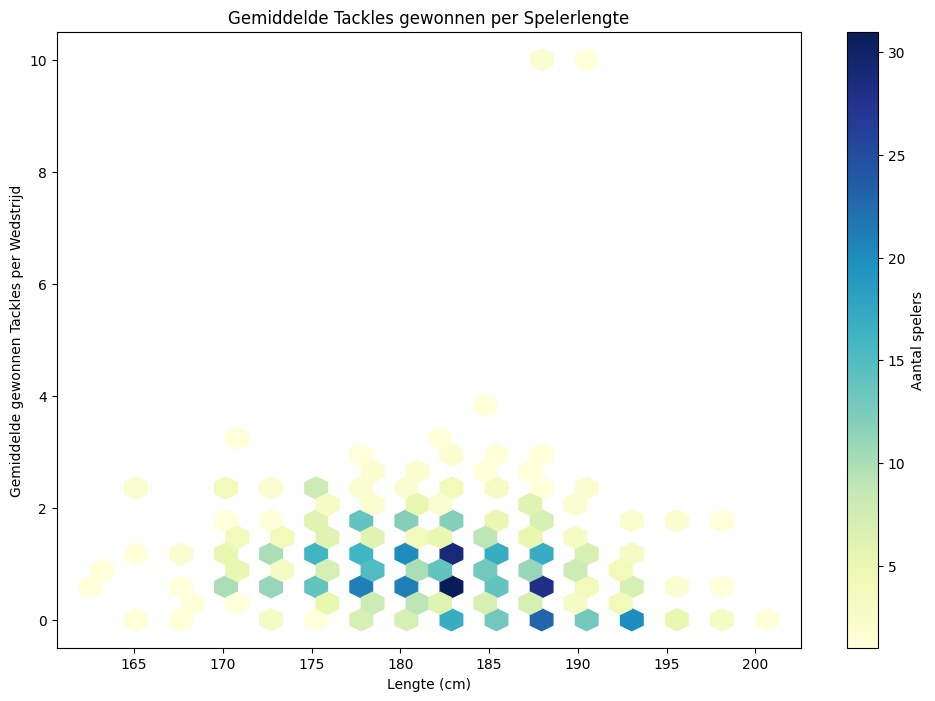

In [ ]:
captured_outputlengtetackel.show()

Uit de analyse blijkt dat ook hier het zwaartepunt ligt rondom de gemiddelde lengte van voetbalspelers (181,9 cm). De meeste spelers winnen gemiddeld 0 tot 2 tackles per wedstrijd. Uit de plot kan worden afgeleid dat over het algemeen, hoe langer de spelers zijn ten opzichte van het gemiddelde, hoe minder tackles zij winnen. Dit geldt ook voor spelers die kleiner zijn dan het gemiddelde.


<Figure size 1200x800 with 0 Axes>

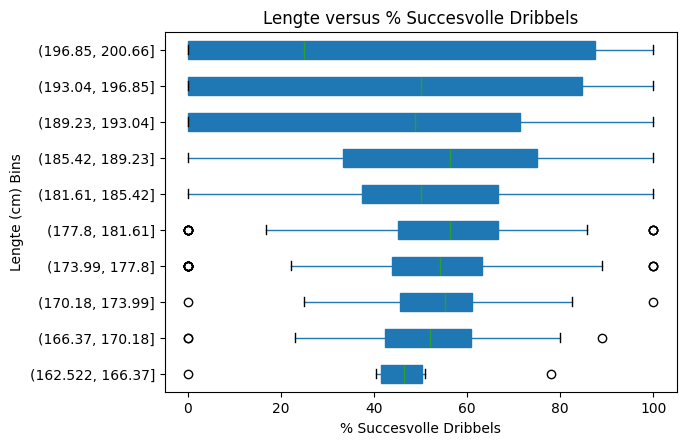

In [ ]:
captured_outputboxplot.show()

Dit boxplot laat zien dat de langste spelers over het algemeen niet uitblinken tegenover de kleinere spelers. De spelers vertonen veel variatie: sommige zijn goed, maar de meeste zijn minder succesvol in dribbelen. Uit deze analyse kan worden gesuggereerd dat zowel langere als kortere spelers geen voordeel hebben bij succesvol dribbelen. Spelers die juist rondom de gemiddelde lengte van voetbalspelers (181,9 cm) liggen, blijken beter te zijn in dribbelen en hebben een gemiddeld hoger succespercentage.

In tegenstelling tot wat voorspeld werd, presteren de kleinere spelers over het algemeen niet het beste, terwijl ook de langere spelers niet dominant zijn. Middelgrote spelers zijn vaak beter in dribbelen. Hoewel lengte een rol speelt in sportprestaties, zijn techniek en vaardigheden net zo belangrijk voor succes bij dribbelen.

## Conclusie
Uit deze analyse blijkt dat lengte tenopzichte van de gemiddelde lengte van alle andere sporters geen significant voordeel biedt bij voetballers of basketballers, wat het idee verwerpt dat langere spelers beter presteren in de sport.

Om meer inzicht te krijgen, is een analyse uitgevoerd van vier factoren die het standpunt kunnen weerleggen dat lengte een potentieel voordeel heeft in de sport. De bevindingen op basis van technische vaardigheden tonen aan dat lengte geen significant voordeel oplevert. De meeste spelers die rond de gemiddelde lengte (voor hun sport) liggen, presteren over het algemeen beter. Basketballers met hogere scores zijn doorgaans zwaarder en langer, terwijl voetballers een breder scala aan lengtes en een lagere BMI vertonen. Lengte en gewicht hebben een aanzienlijke invloed op de prestaties in basketbal, terwijl voetbal een diversiteit aan fysieke profielen vereist. 

Concluderend kunnen zowel perspectief 1 als perspectief 2 verworpen worden. De analyse van spelers gewicht toonde aan dat dit geen invloed heeft op hun rating, en de lengte vertoonde geen duidelijk patroon in de verdeling van ratings. Voor voet- en basketballers zien we wel dat hogere ratings vaak samengaan met een hogere gemiddelde BMI, wat suggereert dat de verhouding van lengte en gewicht belangrijker is dan de lengte of het gewicht zelf.

## Referencies 
* Richtlijnendatabase. (2024). *Diagnostiek van grote lengte en groeiversnelling*. Richtlijnendatabase. https://richtlijnendatabase.nl/richtlijn/triage_en_diagnostiek_van_groeistoornissen_bij_kinderen/diagnostiek_grote_lengte_groeiversnelling.html
* Voedingscentrum. (z.d.). *BMI berekenen*. https://www.voedingscentrum.nl/nl/bmi-meter#:~:text=De%20BMI%20(Body%20Mass%20Index,en%20kinderen%20vanaf%202%20jaar.)
* Welingelichte Kringen. (2024, 28 juni). *Kun je beter groot of klein zijn?* Welingelichte Kringen. https://www.welingelichtekringen.nl/wetenschap/kun-je-beter-groot-of-klein-zijn